In [461]:
import pandas as pd
import numpy as np
import plotly.express as px
from matplotlib import pyplot as plt 
import seaborn as sns
import math
from pandas_profiling import ProfileReport

In [462]:
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_columns = None

In [463]:
df=pd.read_csv('origianl_data_listings.csv')

C:\Users\Spider Store\AppData\Local\Temp\ipykernel_14868\758847792.py:1: DtypeWarning:

Columns (94) have mixed types. Specify dtype option on import or set low_memory=False.



In [464]:
df

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,15420,https://www.airbnb.com/rooms/15420,20190625184115,2019-06-25,Georgian Boutique Apt City Centre,"Stunning, impeccably refurbished spacious grou...",This is a huge and luxurious apartment for 2 -...,"Stunning, impeccably refurbished spacious grou...",none,"The neighbourhood is in the historic New Town,...",Please note that because of my interest in int...,It is easy to walk to many of the main tourist...,Guests have full access at the apartment. All...,Guests will be sent full details of what is su...,The apartment is strictly non-smoking and we r...,NaN,NaN,https://a0.muscache.com/im/pictures/cf69631f-4...,NaN,60423,https://www.airbnb.com/users/show/60423,Charlotte,2009-12-06,"Edinburgh, Scotland, United Kingdom","I have a background in property, having worked...",within a few hours,100%,NaN,t,https://a0.muscache.com/im/users/60423/profile...,https://a0.muscache.com/im/users/60423/profile...,NaN,3.00,3.00,"['email', 'phone', 'manual_online', 'reviews',...",t,t,"Edinburgh, City of Edinburgh, United Kingdom",New Town,"Old Town, Princes Street and Leith Street",NaN,Edinburgh,City of Edinburgh,EH1 3LD,Edinburgh,"Edinburgh, United Kingdom",GB,United Kingdom,55.96,-3.19,f,Apartment,Entire home/apt,2,1.00,1.00,1.00,Real Bed,"{TV,Internet,Wifi,""Wheelchair accessible"",Kitc...",861.00,$80.00,NaN,NaN,$200.00,$40.00,1,$0.00,3,30,1,3,30,30,2.90,30.00,today,t,6,12,22,193,2019-06-25,283,60,2011-01-18,2019-06-23,99.00,10.00,10.00,10.00,10.00,10.00,10.00,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,1,0,0,2.76
1,24288,https://www.airbnb.com/rooms/24288,20190625184115,2019-06-25,"Cool central Loft, sleeps 4, 2 double bed+en-s...",Boho rustic-chic former warehouse Loft located...,"Two bedroom, very central Loft apartment with ...",Boho rustic-chic former warehouse Loft located...,none,It's all in the mix: Culture-museums and galle...,The apartment is in the City centre so being a...,Walk to key central attractions or catch a bus...,The whole flat on the first floor and utility ...,Will meet guests on arrival and at check-out i...,Non smokers only and no smoking in the buildin...,NaN,NaN,https://a0.muscache.com/im/pictures/3460007/88...,NaN,46498,https://www.airbnb.com/users/show/46498,Gordon,2009-10-17,"Edinburgh, Scotland, United 

In [465]:

df=df[['id', 'name', 'host_location', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365',
      'property_type','accommodates','bathrooms','bedrooms','beds','amenities', 'price']] 

In [466]:
df

,id,name,host_location,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,property_type,accommodates,bathrooms,bedrooms,beds,amenities,price
0,15420,Georgian Boutique Apt City Centre,"Edinburgh, Scotland, United Kingdom",New Town,55.96,-3.19,Entire home/apt,3,283,1,193,Apartment,2,1.00,1.00,1.00,"{TV,Internet,Wifi,""Wheelchair accessible"",Kitc...",$80.00
1,24288,"Cool central Loft, sleeps 4, 2 double bed+en-s...","Edinburgh, Scotland, United Kingdom",Southside,55.94,-3.18,Entire home/apt,2,199,1,4,Loft,4,1.50,2.00,2.00,"{TV,Wifi,Kitchen,""Paid parking off premises"",E...",$115.00
2,38628,Edinburgh Holiday Let,"Edinburgh, Scotland, United Kingdom",NaN,55.94,-3.10,Entire home/apt,4,52,2,288,Apartment,2,1.00,0.00,2.00,"{TV,Internet,Wifi,""Wheelchair accessible"",Kitc...",$46.00
3,44552,Double room - spacious Leith flat,"Edinburgh, Scotland, United Kingdom",Leith,55.97,-3.17,Private room,2,184,1,136,Condominium,2,1.00,1.00,1.00,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Pets liv...",$32.00
4,47616,"City flat, close to nature and the Fringe","Edinburgh, Scotland, United Kingdom",Southside,55.95,-3.18,Private room,1,32,1,0,Condominium,2,1.00,1.00,1.00,"{TV,Wifi,Kitchen,""Paid parking off premises"",H...",$100.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13240,36061175,Festival Fun - Edinburgh Living Central Flat,"Scotland, United Kingdom",New Town,55.93,-3.12,Entire home/apt,2,0,2,61,Apartment,3,1.00,1.00,2.00,"{TV,Wifi,Kitchen,""Free parking on premises"",Br...",$95.00
13241,36061191,"The Knight Residence, 1 Bedroom Comfort",GB,Tollcross,55.95,-3.20,Entire home/apt,1,0,8,358,Serviced apartment,3,1.00,1.00,2.00,"{TV,Wifi,Kitchen,""Free parking on premises"",El...","$1,000.00"
13242,36061722,"The Knight Residence, 2 Bedroom Comfort",GB,Old Town,55.95,-3.20,Entire home/apt,1,0,8,358,Serviced apartment,5,2.00,2.00,4.00,"{TV,Wifi,Kitchen,""Free parking on premises"",El...","$1,000.00"
13243,36061940,Student 2 bed flat,GB,NaN,55.93,-3.25,Entire home/apt,213,0,16,298,Apartment,2,1.00,2.00,2.00,"{TV,Wifi,Kitchen,Elevator,Heating,""Suitable fo...",$47.00


In [468]:
df.head(1)

,id,name,host_location,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,property_type,accommodates,bathrooms,bedrooms,beds,amenities,price
0,15420,Georgian Boutique Apt City Centre,"Edinburgh, Scotland, United Kingdom",New Town,55.96,-3.19,Entire home/apt,3,283,1,193,Apartment,2,1.00,1.00,1.00,"{TV,Internet,Wifi,""Wheelchair accessible"",Kitc...",$80.00


In [469]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13245 entries, 0 to 13244
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13245 non-null  int64  
 1   name                            13244 non-null  object 
 2   host_location                   13189 non-null  object 
 3   neighbourhood                   10951 non-null  object 
 4   latitude                        13245 non-null  float64
 5   longitude                       13245 non-null  float64
 6   room_type                       13245 non-null  object 
 7   minimum_nights                  13245 non-null  int64  
 8   number_of_reviews               13245 non-null  int64  
 9   calculated_host_listings_count  13245 non-null  int64  
 10  availability_365                13245 non-null  int64  
 11  property_type                   13245 non-null  object 
 12  accommodates                    

# cleaning the data

In [470]:
df.isnull().sum()

id                                   0
name                                 1
host_location                       56
neighbourhood                     2294
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
calculated_host_listings_count       0
availability_365                     0
property_type                        0
accommodates                         0
bathrooms                           12
bedrooms                             4
beds                                15
amenities                            0
price                                0
dtype: int64

In [471]:
df.dropna(subset=['neighbourhood','host_location'],inplace=True)

C:\Users\Spider Store\AppData\Local\Temp\ipykernel_14868\3361748253.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [472]:
df.isnull().sum()

id                                 0
name                               0
host_location                      0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
minimum_nights                     0
number_of_reviews                  0
calculated_host_listings_count     0
availability_365                   0
property_type                      0
accommodates                       0
bathrooms                         10
bedrooms                           4
beds                              12
amenities                          0
price                              0
dtype: int64

In [473]:
df['bathrooms'].fillna(1,inplace=True)
df['bedrooms'].fillna(2,inplace=True)
df['beds'].fillna(3,inplace=True)

C:\Users\Spider Store\AppData\Local\Temp\ipykernel_14868\3206036070.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Spider Store\AppData\Local\Temp\ipykernel_14868\3206036070.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Spider Store\AppData\Local\Temp\ipykernel_14868\3206036070.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [474]:
df.isnull().sum()

id                                0
name                              0
host_location                     0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
property_type                     0
accommodates                      0
bathrooms                         0
bedrooms                          0
beds                              0
amenities                         0
price                             0
dtype: int64

In [475]:
# df['bathrooms']=df['bathrooms'].astype(int)
# df['bedrooms']=df['bedrooms'].astype(int)
# df['beds']=df['beds'].astype(str).astype(int)

In [476]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10910 entries, 0 to 13242
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              10910 non-null  int64  
 1   name                            10910 non-null  object 
 2   host_location                   10910 non-null  object 
 3   neighbourhood                   10910 non-null  object 
 4   latitude                        10910 non-null  float64
 5   longitude                       10910 non-null  float64
 6   room_type                       10910 non-null  object 
 7   minimum_nights                  10910 non-null  int64  
 8   number_of_reviews               10910 non-null  int64  
 9   calculated_host_listings_count  10910 non-null  int64  
 10  availability_365                10910 non-null  int64  
 11  property_type                   10910 non-null  object 
 12  accommodates                    

In [477]:
df['price']=df['price'].apply(lambda string :string.replace('$',''))

# df['price']=df['price'].apply(lambda string : string.replace('$',''))

C:\Users\Spider Store\AppData\Local\Temp\ipykernel_14868\1140790826.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [478]:
# df['bathrooms'] = pd.to_numeric(df['bathrooms'],errors='coerce')    
# df['bedrooms'] =pd.to_numeric(df['bedrooms'],errors='coerce')    
# df['beds'] = pd.to_numeric(df['beds'],errors='coerce')    


In [479]:
 df['price'] = pd.to_numeric(df['price'],errors='coerce')  

C:\Users\Spider Store\AppData\Local\Temp\ipykernel_14868\957915851.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [480]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10910 entries, 0 to 13242
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              10910 non-null  int64  
 1   name                            10910 non-null  object 
 2   host_location                   10910 non-null  object 
 3   neighbourhood                   10910 non-null  object 
 4   latitude                        10910 non-null  float64
 5   longitude                       10910 non-null  float64
 6   room_type                       10910 non-null  object 
 7   minimum_nights                  10910 non-null  int64  
 8   number_of_reviews               10910 non-null  int64  
 9   calculated_host_listings_count  10910 non-null  int64  
 10  availability_365                10910 non-null  int64  
 11  property_type                   10910 non-null  object 
 12  accommodates                    

In [481]:
df.describe()

,id,latitude,longitude,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,accommodates,bathrooms,bedrooms,beds,price
count,"10,910.00","10,910.00","10,910.00","10,910.00","10,910.00","10,910.00","10,910.00","10,910.00","10,910.00","10,910.00","10,910.00","10,727.00"
mean,"19,876,394.17",55.95,-3.19,2.78,40.62,6.10,96.55,3.65,1.23,1.61,2.08,102.04
std,"9,955,958.92",0.01,0.02,12.47,67.15,18.18,109.68,2.12,0.55,0.94,1.63,86.50
min,"15,420.00",55.91,-3.24,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,"12,968,338.25",55.94,-3.21,1.00,2.00,1.00,0.00,2.00,1.00,1.00,1.00,50.00
50%,"20,086,396.00",55.95,-3.19,2.00,13.00,1.00,50.00,4.00,1.00,1.00,2.00,79.00
75%,"27,363,017.75",55.96,-3.18,2.00,50.00,3.00,157.75,4.00,1.00,2.00,3.00,120.00
max,"36,061,722.00",55.99,-3.12,"1,000.00",773.00,135.00,365.00,19.00,9.00,13.00,30.00,999.00


In [482]:
df.head(1)

,id,name,host_location,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,property_type,accommodates,bathrooms,bedrooms,beds,amenities,price
0,15420,Georgian Boutique Apt City Centre,"Edinburgh, Scotland, United Kingdom",New Town,55.96,-3.19,Entire home/apt,3,283,1,193,Apartment,2,1.00,1.00,1.00,"{TV,Internet,Wifi,""Wheelchair accessible"",Kitc...",80.00


# univariate analysis

<Axes: >

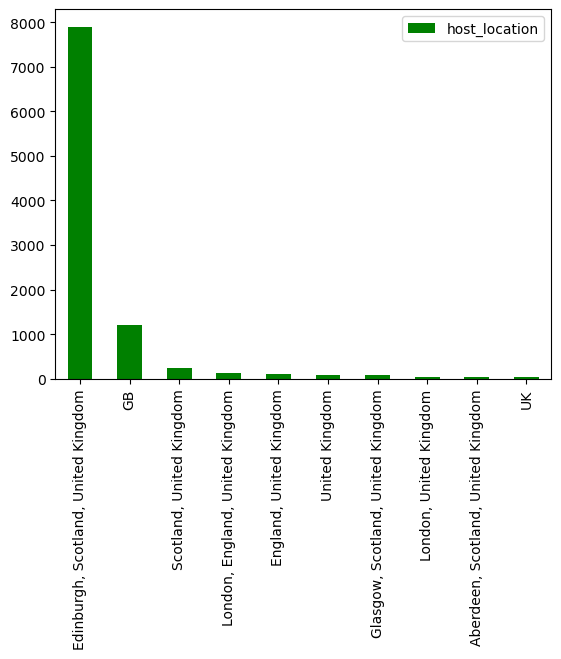

In [483]:
df['host_location'].value_counts().head(10).to_frame().plot(kind='bar',color='green')

<Axes: >

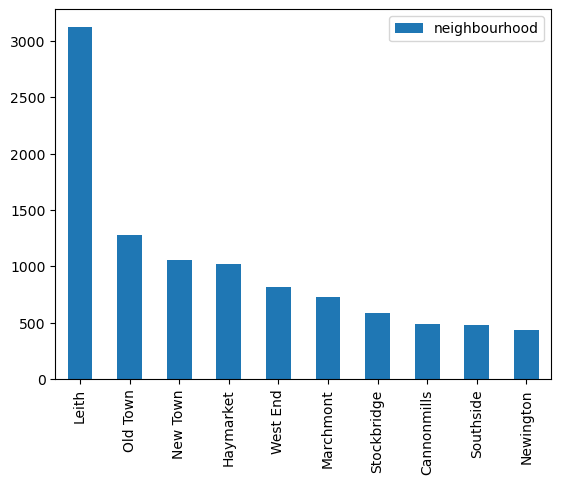

In [484]:
df['neighbourhood'].value_counts().head(10).to_frame().plot(kind='bar')

In [485]:
df['room_type'].value_counts()

Entire home/apt    7291
Private room       3556
Shared room          63
Name: room_type, dtype: int64

In [487]:
px.bar(data_frame=df['room_type'].value_counts())

In [488]:
df['property_type'].value_counts().head(10)

Apartment             9483
House                  532
Townhouse              235
Condominium            141
Serviced apartment     120
Bed and breakfast       78
Boutique hotel          60
Hostel                  59
Guesthouse              33
Loft                    31
Name: property_type, dtype: int64

In [489]:
px.bar(data_frame=df['property_type'].value_counts().head(10))

In [490]:
df['property_type'].value_counts().tail(10)

Camper/RV                 18
Villa                     15
Other                     12
Aparthotel                 9
Hotel                      4
Boat                       2
Farm stay                  1
Cabin                      1
Casa particular (Cuba)     1
Barn                       1
Name: property_type, dtype: int64

In [491]:
px.bar(data_frame=df['property_type'].value_counts().tail(10))

In [492]:
px.box(df,x='price')

# bivariate analysis

In [501]:
df.groupby(['neighbourhood'])['property_type'].count()

neighbourhood
Bruntsfield     290
Cannonmills     484
Haymarket      1018
Leith          3124
Marchmont       730
Morningside     346
New Town       1054
Newington       437
Old Town       1276
Southside       480
Stockbridge     582
Tollcross       269
West End        820
Name: property_type, dtype: int64

In [508]:
px.bar(data_frame=df.groupby(['neighbourhood'])['property_type'].count().sort_values(ascending=False))

In [522]:
df[["neighbourhood","price"]].corr()

C:\Users\Spider Store\AppData\Local\Temp\ipykernel_14868\378930407.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,price
price,1.00


In [542]:
df.nlargest(10,'price')['neighbourhood']


1216        West End
8275     Cannonmills
11631       New Town
11632       New Town
11633       Old Town
12001       New Town
11890      Newington
12116    Bruntsfield
8427           Leith
143         Old Town
Name: neighbourhood, dtype: object

In [511]:
df[["host_location","price"]].corr()

C:\Users\Spider Store\AppData\Local\Temp\ipykernel_14868\2455897855.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,price
price,1.00


In [543]:
df.nlargest(10,'price')['host_location']

1216     Edinburgh, Scotland, United Kingdom
8275     Edinburgh, Scotland, United Kingdom
11631                                     GB
11632                                     GB
11633                                     GB
12001                                     GB
11890    Edinburgh, Scotland, United Kingdom
12116                                     GB
8427                                      GB
143      Edinburgh, Scotland, United Kingdom
Name: host_location, dtype: object

In [545]:
df['len_amenities']=df['amenities'].apply(len)

C:\Users\Spider Store\AppData\Local\Temp\ipykernel_14868\1073256781.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [546]:
df[["len_amenities","price"]].corr()

,len_amenities,price
len_amenities,1.00,0.01
price,0.01,1.00
